<a href="https://colab.research.google.com/github/aecampb1/AI-ML-Projects/blob/AI%2FML-Projects/UT%20Austin%20/%20Food_Hub_Food_Delivery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
df.isna().sum() #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the summary statistics of the numerical data
print(df.describe().T) ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)
print('The minimum food prep time is ',df.food_preparation_time.min(), 'min')
print('The mean food prep time is ', df.food_preparation_time.mean(), 'min')
print('The max food prep time is ', df.food_preparation_time.max(),  'min')
print('The mean order cost is ', df.cost_of_the_order.mean(), 'dollars')
print('The median order cost is ', df.cost_of_the_order.median(), 'dollars')

                        count          mean            std         min  \
order_id               1898.0  1.477496e+06     548.049724  1476547.00   
customer_id            1898.0  1.711685e+05  113698.139743     1311.00   
cost_of_the_order      1898.0  1.649885e+01       7.483812        4.47   
food_preparation_time  1898.0  2.737197e+01       4.632481       20.00   
delivery_time          1898.0  2.416175e+01       4.972637       15.00   

                              25%         50%           75%         max  
order_id               1477021.25  1477495.50  1.477970e+06  1478444.00  
customer_id              77787.75   128600.00  2.705250e+05   405334.00  
cost_of_the_order           12.08       14.14  2.229750e+01       35.41  
food_preparation_time       23.00       27.00  3.100000e+01       35.00  
delivery_time               20.00       25.00  2.800000e+01       33.00  
The minimum food prep time is  20 min
The mean food prep time is  27.371970495258168 min
The max food prep time

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts() ## Complete the code

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

<Axes: xlabel='cuisine_type', ylabel='count'>

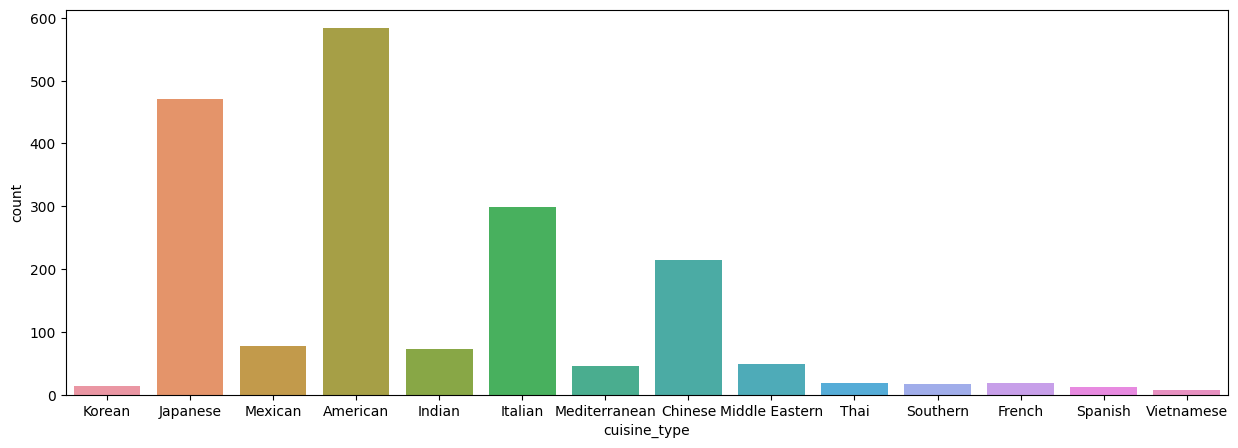

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

#### Cost of the order

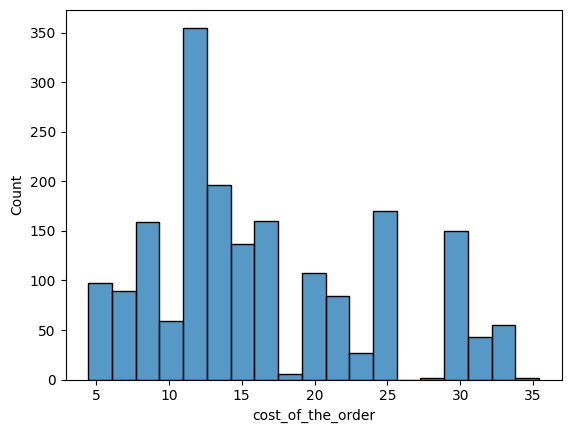

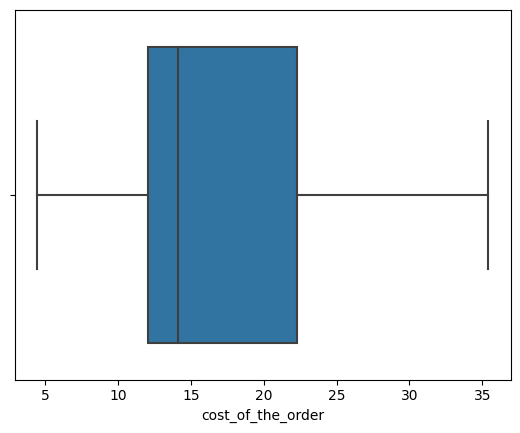

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

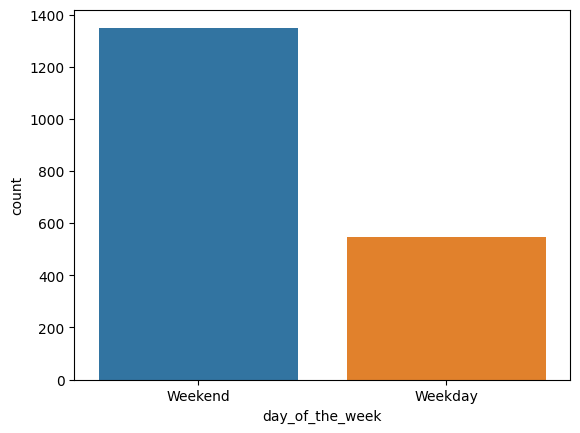

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week')
plt.savefig("output.jpg", bbox_inches='tight')  ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [ ]:
# Check the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

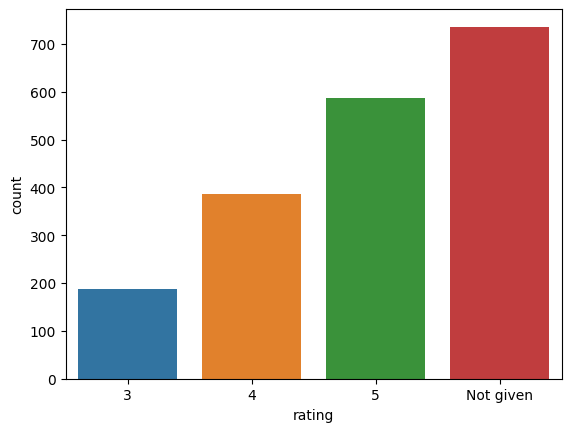

In [ ]:
sns.countplot(data = df, x = 'rating', order=['3','4','5', 'Not given'])
plt.savefig("output.jpg", bbox_inches='tight')
 ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

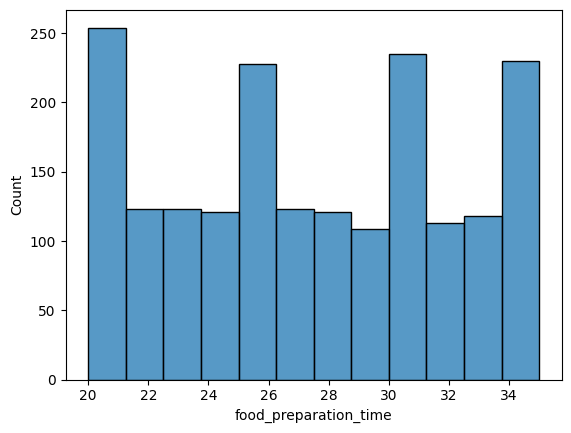

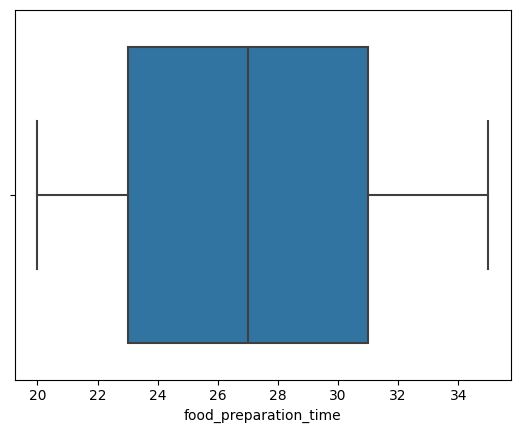

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Delivery time

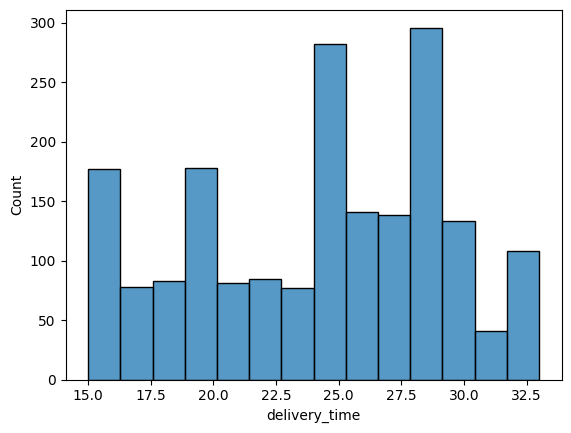

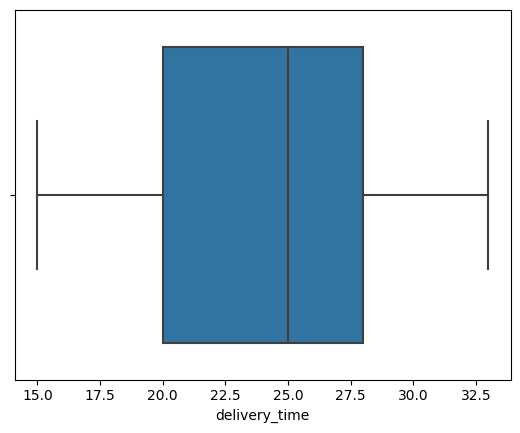

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts(ascending = False) ## Complete the code


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
df_number_of_ratings = df['restaurant_name'].value_counts(ascending = False)
df_number_of_ratings.head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Complete the code to check unique values for the cuisine type on weekend

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

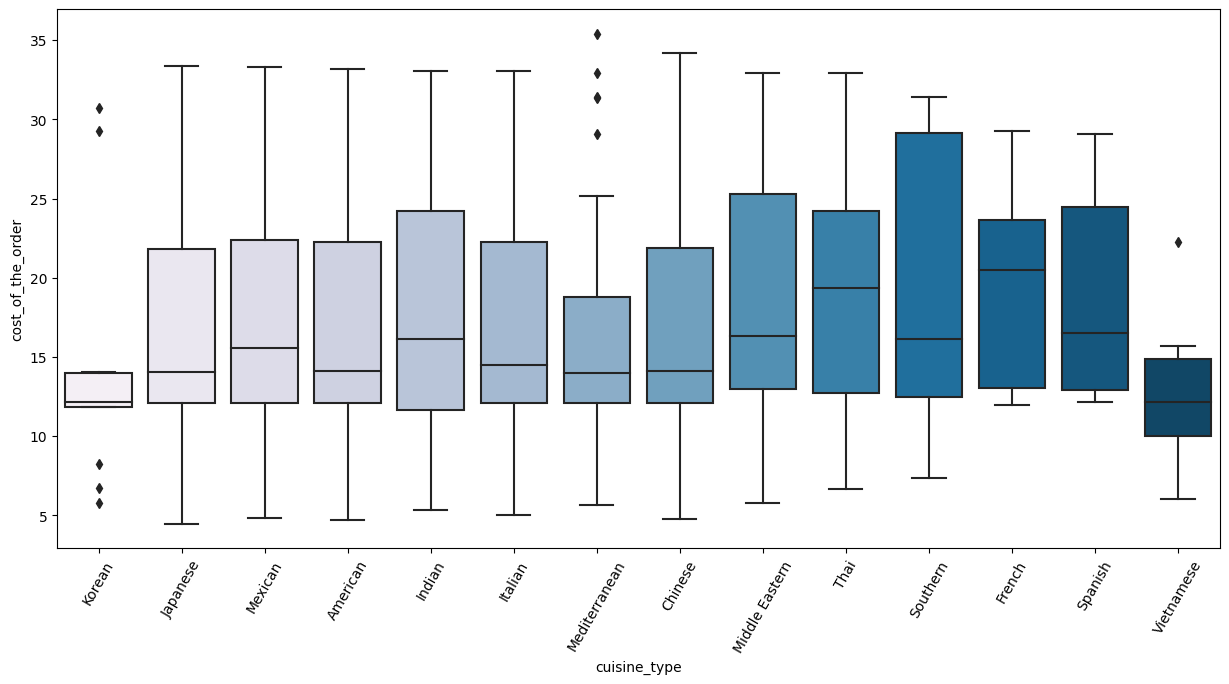

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Cuisine vs Food Preparation time

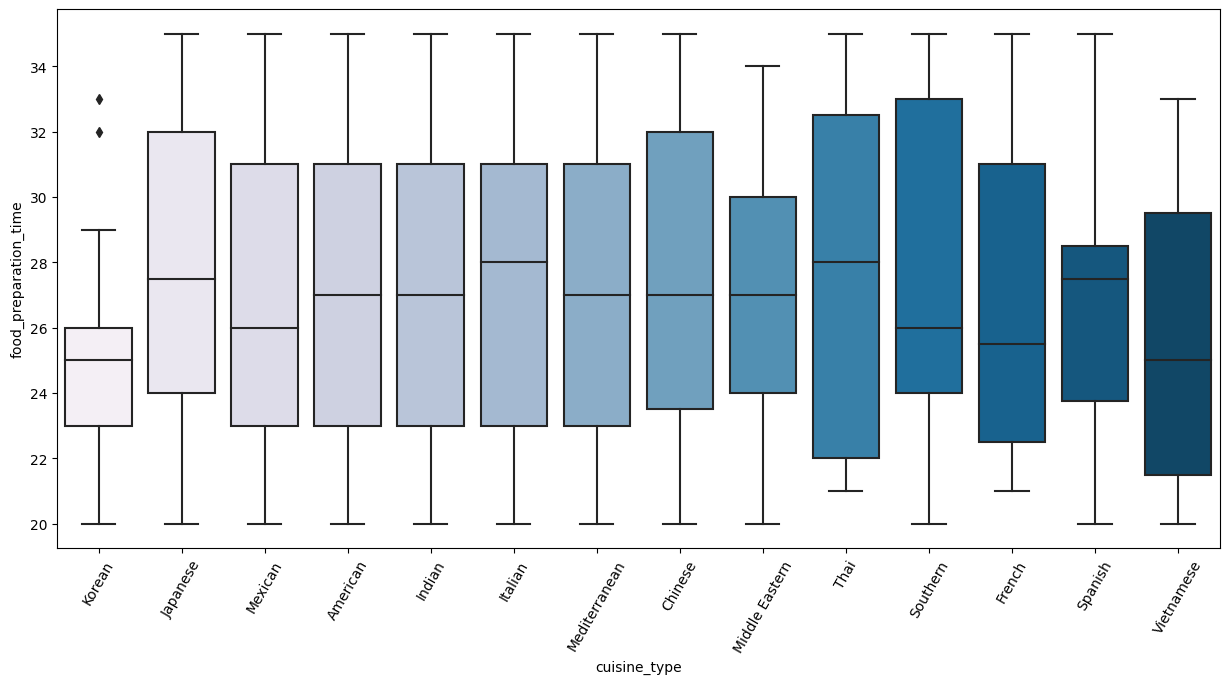

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Day of the Week vs Delivery time

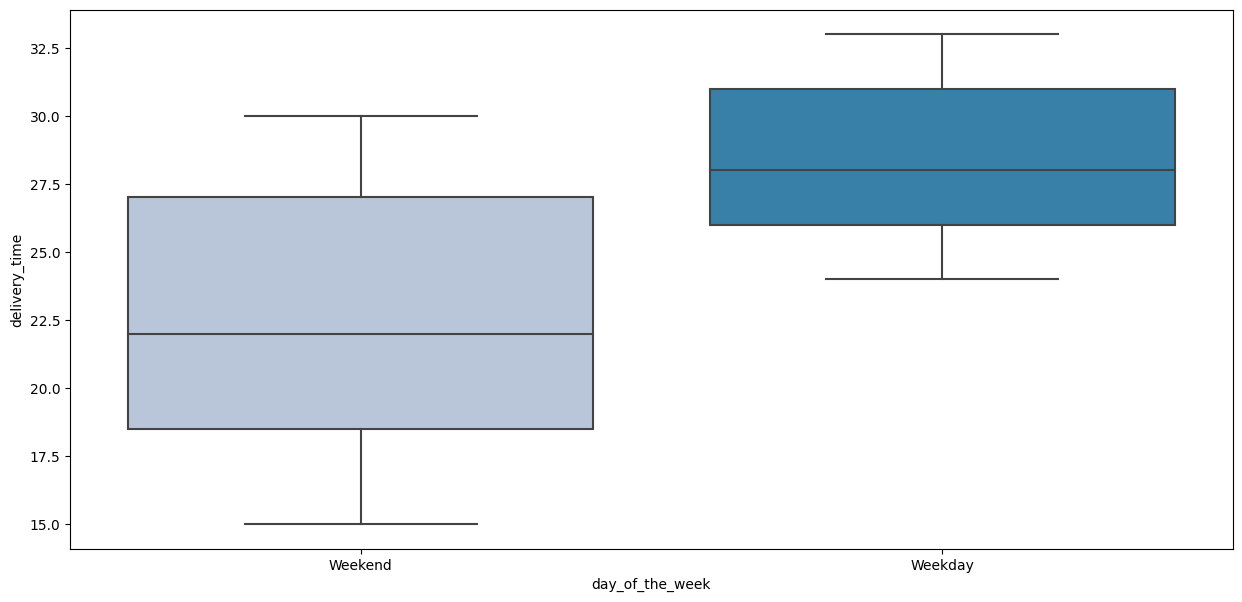

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

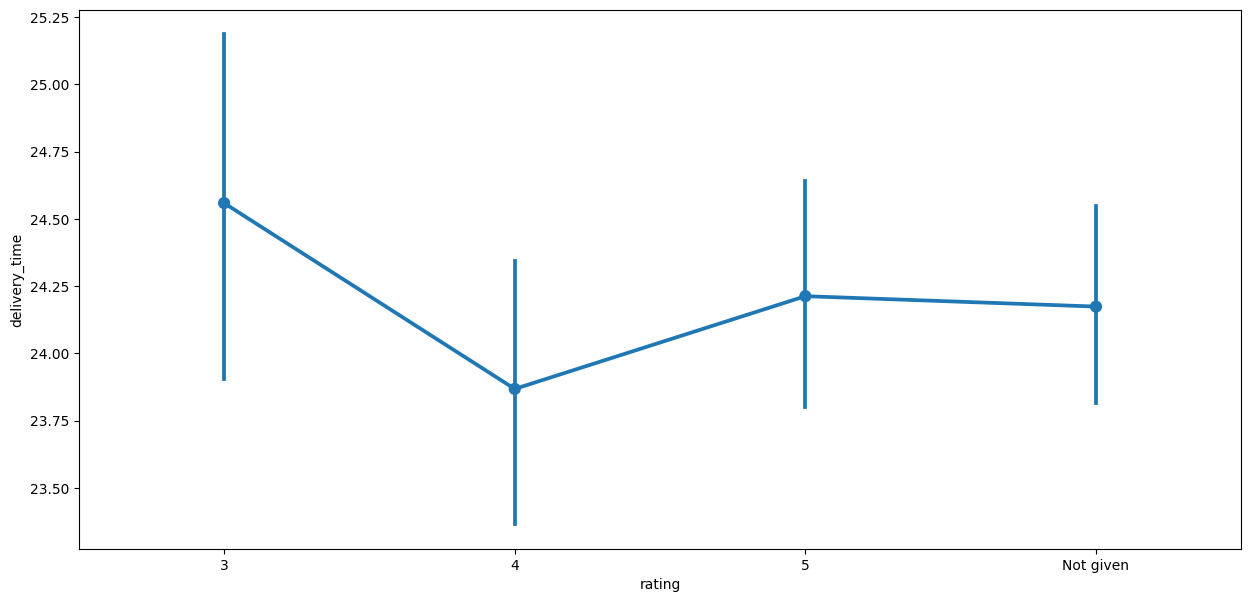

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, order=['3', '4', '5', 'Not given'])
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Rating vs Food preparation time

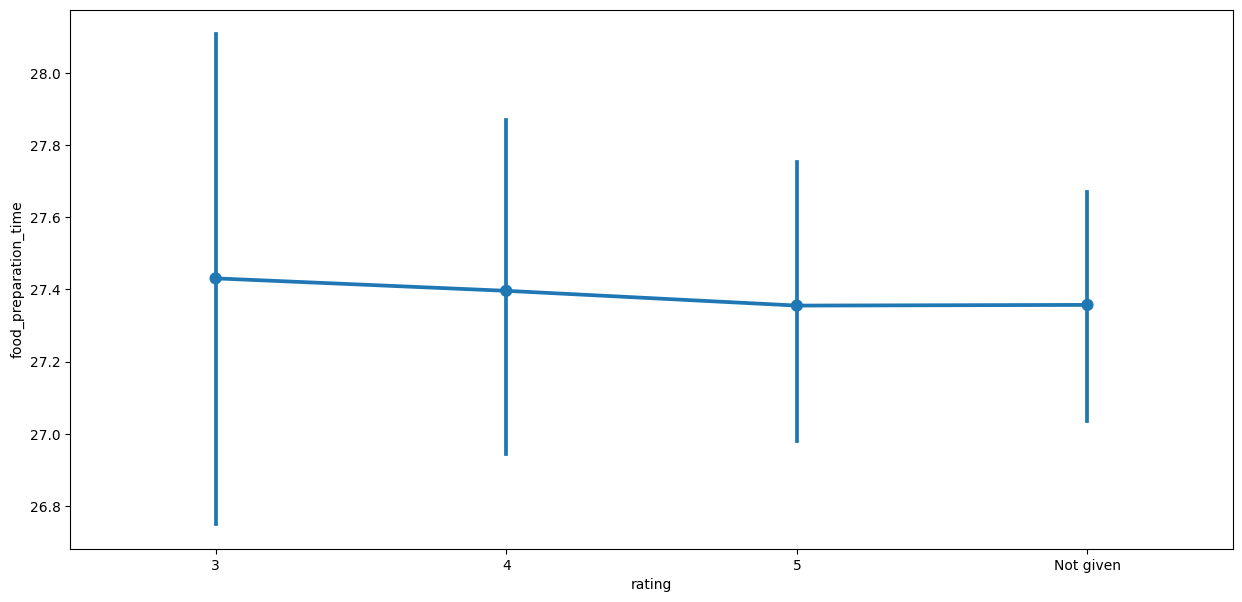

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, order=['3', '4', '5', 'Not given'])  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Rating vs Cost of the order

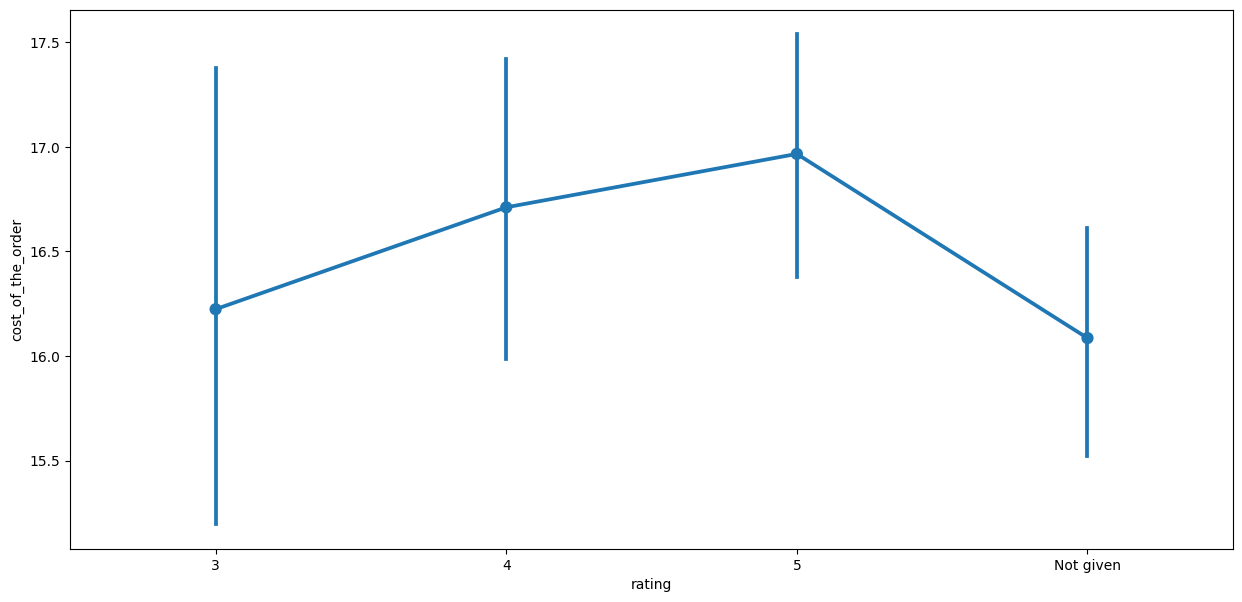

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, order=['3', '4', '5', 'Not given'])   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

#### Correlation among variables

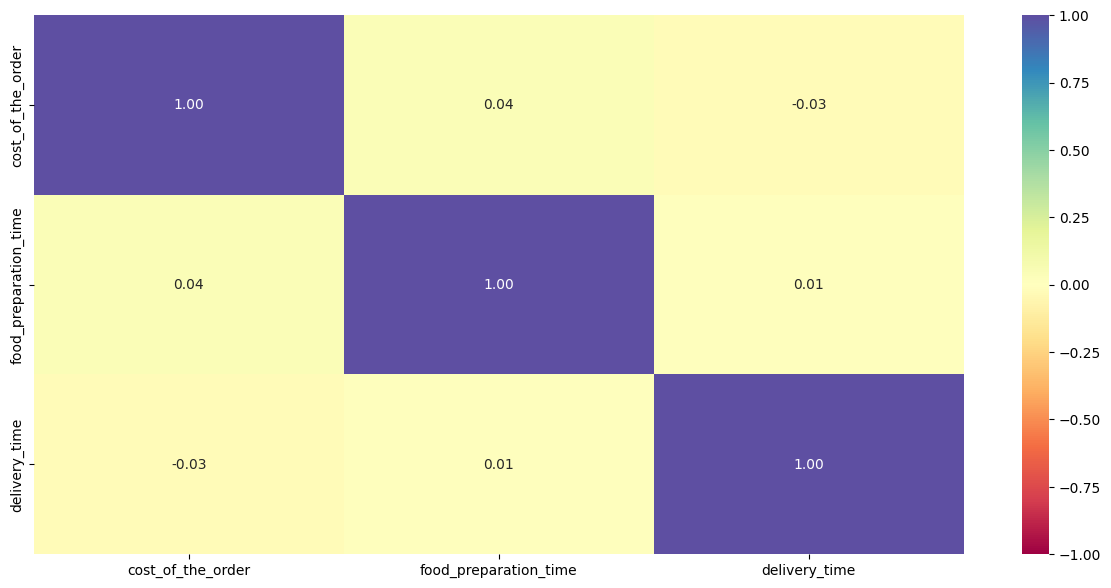

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

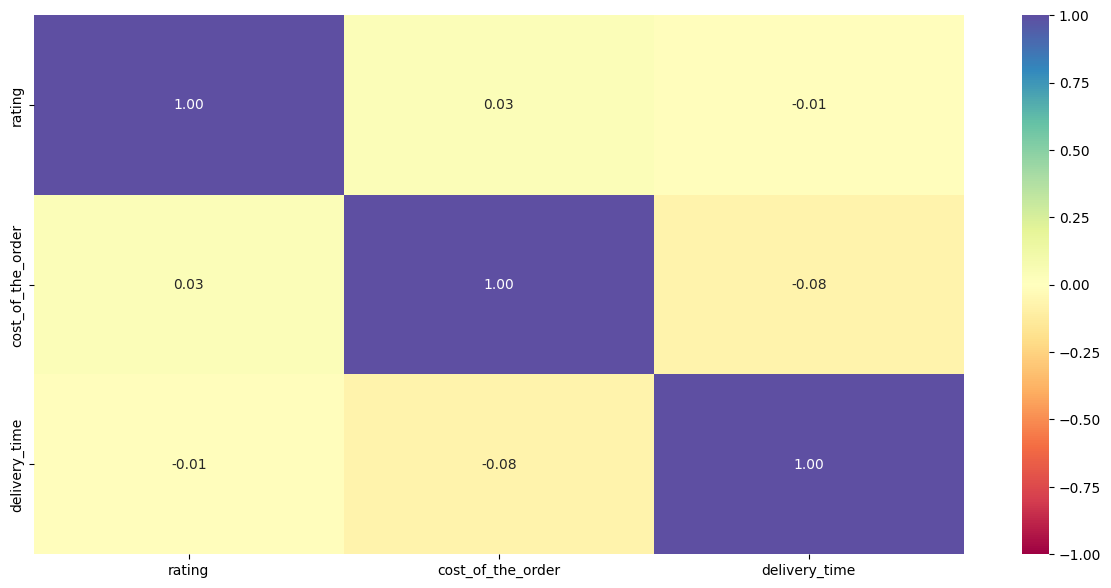

In [ ]:
# Plot the heatmap
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')
other_list = ['rating', 'cost_of_the_order', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df_rated[other_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(178)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [ ]:


# Corrected new_column_data list
new_column_data = [
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'
]


# Add the new column to the DataFrame
df_rating_count['Rated/Not Rated'] = new_column_data

# Display the updated DataFrame
print(df_rating_count)


NameError: ignored

In [ ]:

# Get the restaurant names that have rating count more than 50
df_rating_count50 = df_rating_count['rating'] > 50
rest_names = df_rating_count[df_rating_count50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating



,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [ ]:

df_rating_count = df_rating_count['rating'] > 0
rest_names2 = df_rating_count[df_rating_count50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
df_merge = df.merge(df_rating_count, on = 'restaurant_name', how = 'outer')
df_merge.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating_x,food_preparation_time,delivery_time,Revenue,rating_y,R/NR
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,NaN,NaN
1,1477600,347263,Hangawi,Korean,6.74,Weekend,Not given,21,22,1.0110,NaN,NaN
2,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,18.0,Yes
3,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.2575,18.0,Yes
4,1477324,263426,Blue Ribbon Sushi Izakaya,Japanese,12.13,Weekday,5,30,29,1.8195,18.0,Yes


In [ ]:
data[['Total Space','Price']].corr()

In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')







The net revenue is around 6166.3 dollars


In [ ]:
df.groupby(['restaurant_name'])['Revenue'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                              703.6070
The Meatball Shop                        419.8285
Blue Ribbon Sushi                        360.4605
Blue Ribbon Fried Chicken                340.2035
Parm                                     218.5570
RedFarm Broadway                         191.4675
RedFarm Hudson                           180.9340
TAO                                      167.3570
Han Dynasty                              149.3985
Rubirosa                                 140.8085
Sushi of Gari 46                         130.4985
Nobu Next Door                           115.8250
Blue Ribbon Sushi Bar & Grill            114.9485
Chipotle Mexican Grill $1.99 Delivery    106.6605
Name: Revenue, dtype: float64

In [ ]:
# Get the restaurant names that have rating count more than 50
df_rated_restaurants = df_rating_count['rating'] > 0
rated_rest_names = df_rating_count[df_rated_restaurants]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_revenue_rated = df[df['restaurant_name'].isin(rated_rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_revenue_rated.groupby(['restaurant_name'])['Revenue'].sum().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,Revenue
0,Shake Shack,703.6070
1,The Meatball Shop,419.8285
2,Blue Ribbon Sushi,360.4605
3,Blue Ribbon Fried Chicken,340.2035
4,Parm,218.5570
...,...,...
151,Chola Eclectic Indian Cuisine,1.3095
152,Woorijip,1.2375
153,'wichcraft,1.2150
154,Cipriani Le Specialita,0.8880


In [ ]:
total_rev_rated=df_revenue_rated['Revenue'].sum()
print('The net revenue for rated restaurants is', round(total_rev_rated, 2), 'dollars')

The net revenue for rated restaurants is 6069.88 dollars


In [ ]:
# Find the restaurant names with no ratings
no_rating_names = df[df['rating'] == 'Not given']['restaurant_name'].unique()

# Filter the data for restaurants with no ratings
df_revenue_nr = df[df['restaurant_name'].isin(no_rating_names)]

# Group the restaurant names with their revenue and sum the revenue for the restaurants
result = df_revenue_nr.groupby('restaurant_name')['Revenue'].sum().reset_index()

# Sort the result in descending order of revenue
result = result.sort_values(by='Revenue', ascending=False)

# Remove restaurants that have ratings other than 'Not given'
result = result[result['restaurant_name'].isin(no_rating_names)]

# Drop rows with missing values if any
result = result.dropna()

# Print the result
print(result)


                restaurant_name   Revenue
99                  Shake Shack  703.6070
111           The Meatball Shop  419.8285
16            Blue Ribbon Sushi  360.4605
15    Blue Ribbon Fried Chicken  340.2035
78                         Parm  218.5570
..                          ...       ...
46            Gaia Italian Cafe    1.3170
61                    La Follia    1.2075
67                 Market Table    1.0185
122                     Wa Jeal    1.0110
12   Big Wong Restaurant _¤¾Ñ¼    0.8880

[134 rows x 2 columns]


In [ ]:
no_rating=["Hangawi", "Big Wong Restaurant", "Bistango", "Tarallucci e Vino Restaurant", "Room Service", "Friend of a Farmer", "Posto", "Spice Thai", "Gaia Italian Cafe", "Rohm Thai", "Alidoro", "La Follia", "Aurora", "Crema Restaurante", "Market Table", "DespaÌ±a", "Lamarca Pasta", "Paul & Jimmy's", "Coppola's East", "Emporio", "Wa Jeal", "Le Zie 2000 Trattoria", "Hiroko's Place"]
len(no_rating)


23

In [ ]:
# Filter the data for restaurants with no ratings
df_revenue_nr = df[df['restaurant_name'].isin(no_rating)]

# Group the restaurant names with their revenue and sum the revenue for the restaurants
result = df_revenue_nr.groupby('restaurant_name')['Revenue'].sum().reset_index()

# Sort the result in descending order of revenue
result = result.sort_values(by='Revenue', ascending=False)

# Remove restaurants that have ratings other than 'Not given'
result = result[result['restaurant_name'].isin(no_rating)]

# Drop rows with missing values if any
result = result.dropna()

# Print the result
print(result)

                 restaurant_name  Revenue
2                       Bistango  11.5200
20  Tarallucci e Vino Restaurant   9.0135
7             Friend of a Farmer   8.9675
9                        Hangawi   8.6985
18                  Room Service   8.4155
6                        Emporio   7.8575
17                     Rohm Thai   7.2750
1                         Aurora   6.4935
16                         Posto   6.0625
5                       DespaÌ±a   4.9560
15                Paul & Jimmy's   2.4075
4              Crema Restaurante   2.3790
19                    Spice Thai   2.3790
13         Le Zie 2000 Trattoria   2.3205
10                Hiroko's Place   1.9575
3                 Coppola's East   1.9575
0                        Alidoro   1.8915
12                 Lamarca Pasta   1.3830
8              Gaia Italian Cafe   1.3170
11                     La Follia   1.2075
14                  Market Table   1.0185
21                       Wa Jeal   1.0110


In [ ]:
result.sum()

restaurant_name    BistangoTarallucci e Vino RestaurantFriend of ...
Revenue                                                      100.489
dtype: object

In [ ]:
100.49/6166.30

0.01629664466535848

In [ ]:
6069.88/6166.30

0.9843633945802183

In [ ]:
22/178

0.12359550561797752

In [ ]:
156/178

0.8764044943820225

In [ ]:
rest_rating = len(df[df['rating'] != 'Not given'].groupby('restaurant_name'))
print("The number of restaurants with a rating is:", rest_rating)

The number of restaurants with a rating is: 156


In [ ]:
result = [
    {'restaurant_name': 'Bistango', 'R/NR': 'No'},
    {'restaurant_name': 'Tarallucci e Vino Restaurant', 'R/NR': 'No'},
    {'restaurant_name': 'Friend of a Farmer', 'R/NR': 'No'},
    {'restaurant_name': 'Hangawi', 'R/NR': 'No'},
    {'restaurant_name': 'Room Service', 'R/NR': 'No'},
    {'restaurant_name': 'Emporio', 'R/NR': 'No'},
    {'restaurant_name': 'Rohm Thai', 'R/NR': 'No'},
    {'restaurant_name': 'Aurora', 'R/NR': 'No'},
    {'restaurant_name': 'Posto', 'R/NR': 'No'},
    {'restaurant_name': 'Despaña', 'R/NR': 'No'},
    {'restaurant_name': "Paul & Jimmy's", 'R/NR': 'No'},
    {'restaurant_name': 'Crema Restaurante', 'R/NR': 'No'},
    {'restaurant_name': 'Spice Thai', 'R/NR': 'No'},
    {'restaurant_name': 'Le Zie 2000 Trattoria', 'R/NR': 'No'},
    {'restaurant_name': "Hiroko's Place", 'R/NR': 'No'},
    {'restaurant_name': "Coppola's East", 'R/NR': 'No'},
    {'restaurant_name': 'Alidoro', 'R/NR': 'No'},
    {'restaurant_name': 'Lamarca Pasta', 'R/NR': 'No'},
    {'restaurant_name': 'Gaia Italian Cafe', 'R/NR': 'No'},
    {'restaurant_name': 'La Follia', 'R/NR': 'No'},
    {'restaurant_name': 'Market Table', 'R/NR': 'No'},
    {'restaurant_name': 'Wa Jeal', 'R/NR': 'No'}
]

# Convert the list to a DataFrame
df_NR = pd.DataFrame(result)

# Display the DataFrame
print(df_NR)




                 restaurant_name R/NR
0                       Bistango   No
1   Tarallucci e Vino Restaurant   No
2             Friend of a Farmer   No
3                        Hangawi   No
4                   Room Service   No
5                        Emporio   No
6                      Rohm Thai   No
7                         Aurora   No
8                          Posto   No
9                        Despaña   No
10                Paul & Jimmy's   No
11             Crema Restaurante   No
12                    Spice Thai   No
13         Le Zie 2000 Trattoria   No
14                Hiroko's Place   No
15                Coppola's East   No
16                       Alidoro   No
17                 Lamarca Pasta   No
18             Gaia Italian Cafe   No
19                     La Follia   No
20                  Market Table   No
21                       Wa Jeal   No


In [ ]:
df_merged = pd.merge(df_merge, df_NR, on='restaurant_name', how='outer')
df_merged.head(50)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating_x,food_preparation_time,delivery_time,Revenue,rating_y,R/NR_x,R/NR_y
0,1477147.0,337525.0,Hangawi,Korean,30.75,Weekend,Not given,25.0,20.0,7.6875,NaN,NaN,No
1,1477600.0,347263.0,Hangawi,Korean,6.74,Weekend,Not given,21.0,22.0,1.0110,NaN,NaN,No
2,1477685.0,358141.0,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25.0,23.0,1.8120,18.0,Yes,NaN
3,1477373.0,139885.0,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21.0,22.0,8.2575,18.0,Yes,NaN
4,1477324.0,263426.0,Blue Ribbon Sushi Izakaya,Japanese,12.13,Weekday,5,30.0,29.0,1.8195,18.0,Yes,NaN
5,1477758.0,334619.0,Blue Ribbon Sushi Izakaya,Japanese,14.07,Weekday,4,24.0,26.0,2.1105,18.0,Yes,NaN
6,1477843.0,241719.0,Blue Ribbon Sushi Izakaya,Japanese,13.10,Weekday,5,24.0,28.0,1.9650,18.0,Yes,NaN
7,1477731.0,122609.0,Blue Ribbon Sushi Izakaya,Japanese,24.25,Weekend,5,33.0,21.0,6.0625,18.0,Yes,NaN
8,1477997.0,186473.0,Blue Ribbon Sushi Izakaya,Japanese,12.23,Weekend,3,34.0,25.0,1.8345,18.0,Yes,NaN
9,1476741.0,318095.0,Blue Ribbon Sushi Izakaya,Japanese,6.79,Weekend,5,32.0,30.0,1.0185,18.0,Yes,NaN


<Figure size 1500x700 with 0 Axes>

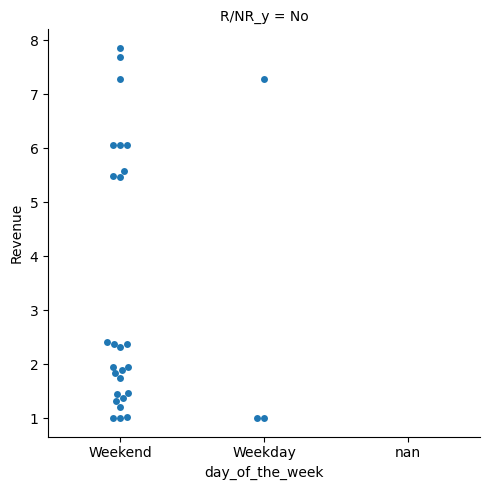

In [ ]:
plt.figure(figsize=(15,7))
sns.catplot(data=df_merged, x="day_of_the_week", y="Revenue", col="R/NR_y", kind='swarm');

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese'),
  Text(14, 0, 'nan')])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


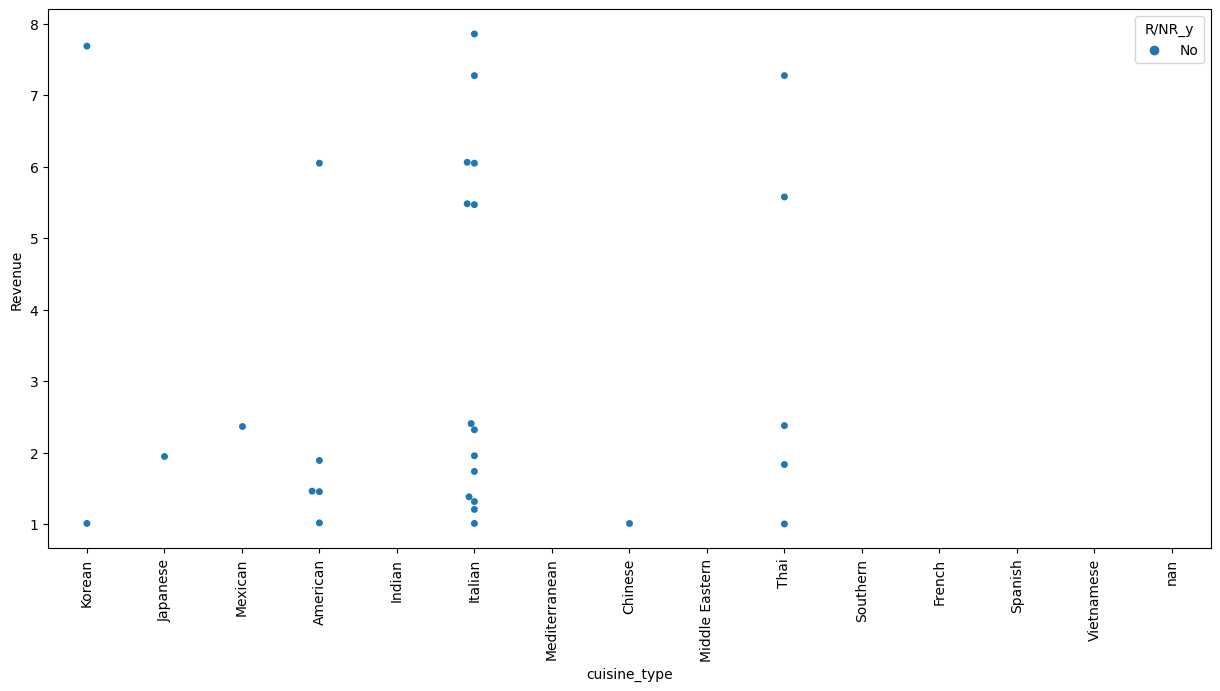

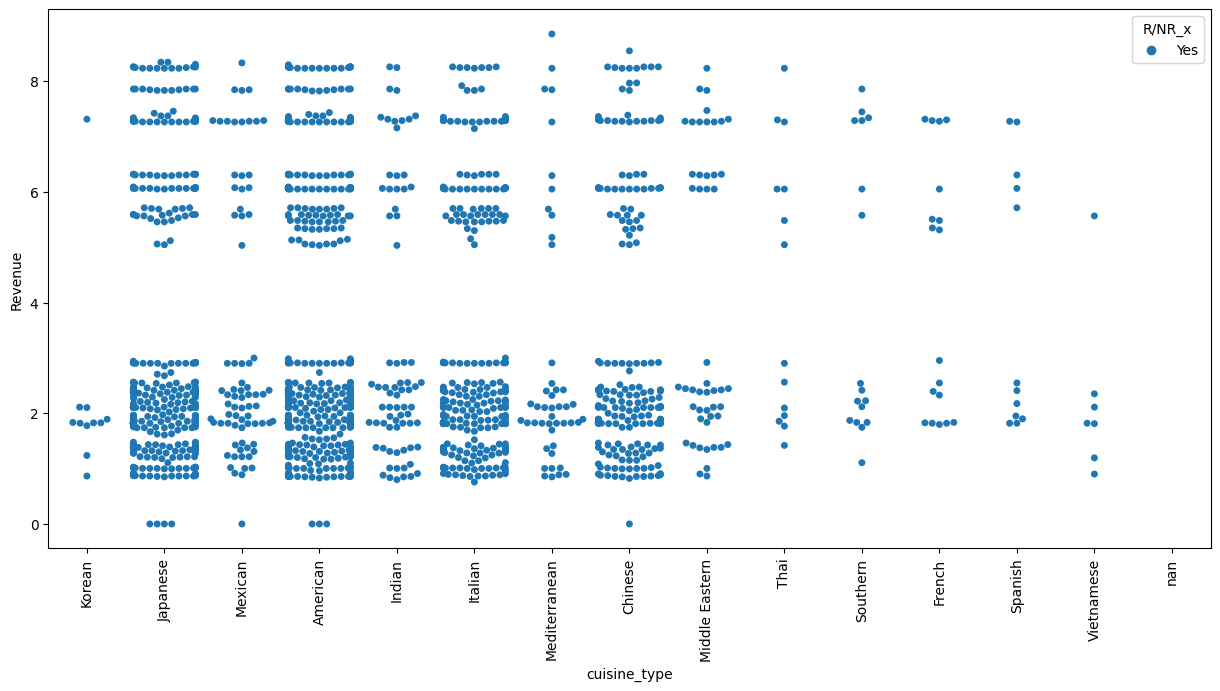

In [ ]:
 plt.figure(figsize=(15,7))
sns.swarmplot(data=df_merged, x="cuisine_type", y="Revenue", hue="R/NR_y", dodge=True);
plt.xticks(rotation=90)

plt.figure(figsize=(15,7))
sns.swarmplot(data=df_merged, x="cuisine_type", y="Revenue", hue="R/NR_x", dodge=True);
plt.xticks(rotation=90)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 24.1% of the points cannot be place

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese'),
  Text(14, 0, 'nan')])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


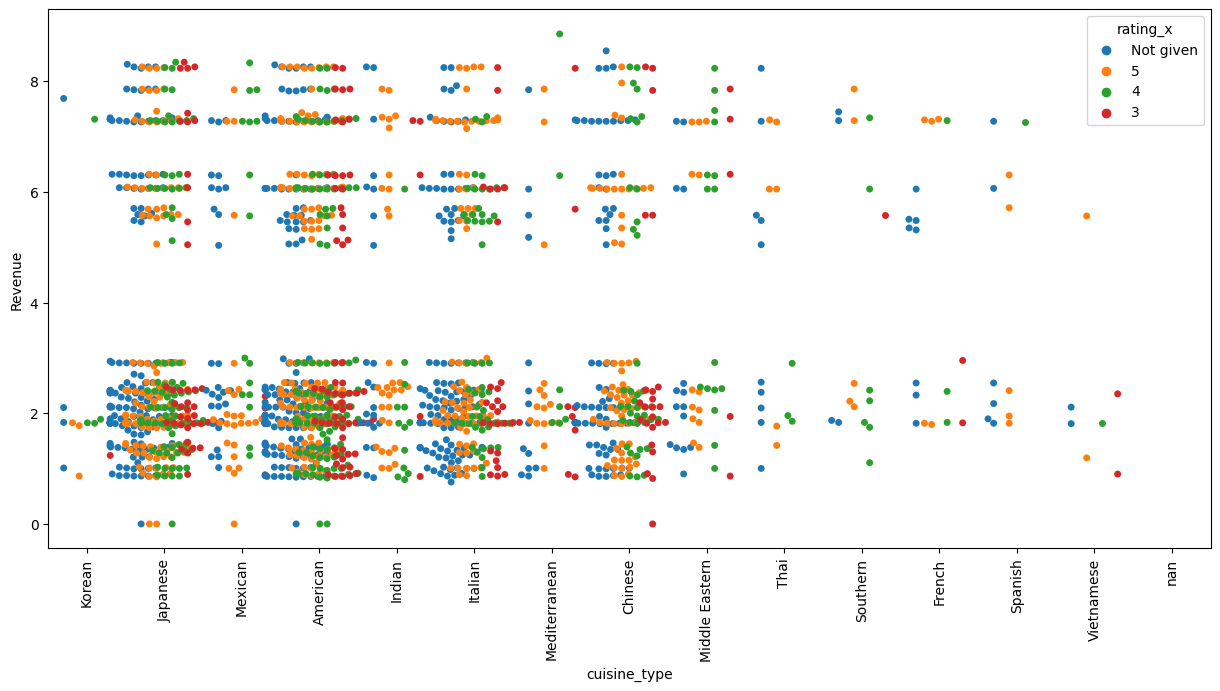

In [ ]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=df_merged, x="cuisine_type", y="Revenue", hue="rating_x", dodge=True);
plt.xticks(rotation=90)

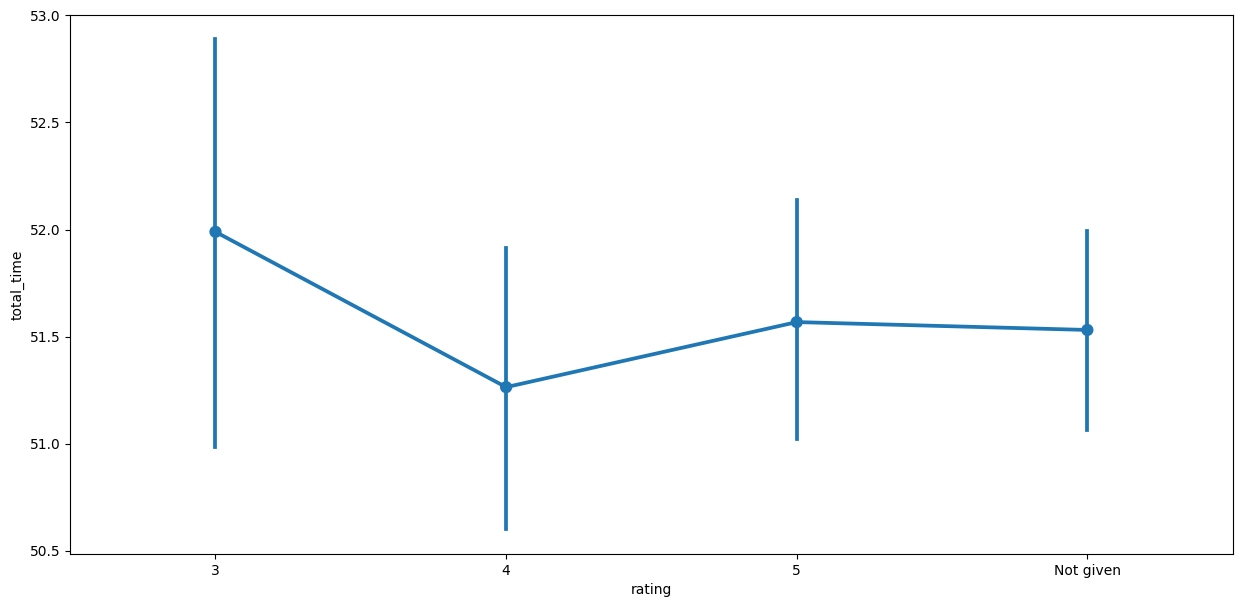

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'total_time', data = df, order=['3', '4', '5', 'Not given'])
plt.savefig("output.jpg", bbox_inches='tight')
plt.show()

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
df_greater_than_60min = df[df['total_time']>60] ## Write the appropriate column name to get the orders having time above 60 min

# Calculate the number of total orders where the total time is above 60 min
print('The number of total orders that take over an hour is:', df_greater_than_60min.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60min.shape[0] / df.shape[0]) * 100

print("Percentage of orders over 60 min:", round(percentage, 2), '%')




The number of total orders that take over an hour is: 200
Percentage of orders over 60 min: 10.54 %


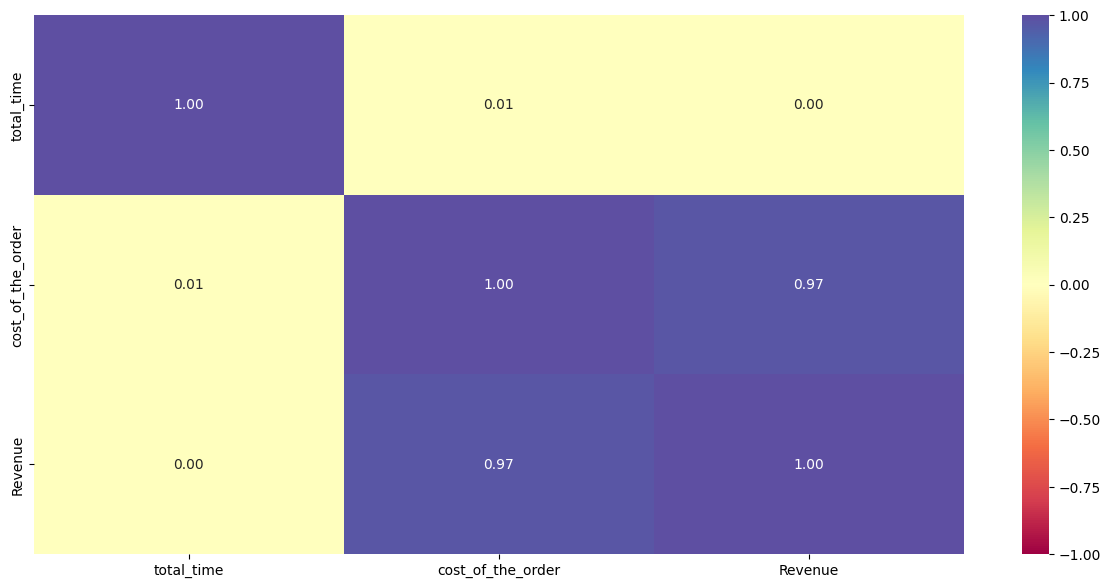

In [ ]:
revenue_list = ['total_time', 'cost_of_the_order', 'Revenue']
plt.figure(figsize=(15, 7))
sns.heatmap(df[revenue_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekdends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---